# Label encoding

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

## TIF label to PNG label encoding

In [2]:
# Define input and output folders
input_folder = '1_data_preparation/dataset/label'
output_folder = '1_data_preparation/dataset_png/label_encoding'

# Make sure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Iterate over all TIF images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.tif') or filename.endswith('.tiff'):
        # Reading TIF images
        tif_image = Image.open(os.path.join(input_folder, filename))
        
        # Convert to grayscale image (single channel)
        gray_image = tif_image.convert('L')
        
        # Convert grayscale image to numpy array
        gray_array = np.array(gray_image)
        
        # Set black pixel values ​​to 0 and white pixel values ​​to 1
        binary_array = np.where(gray_array > 128, 1, 0).astype(np.uint8)
        
        # Convert back to Pillow image
        binary_image = Image.fromarray(binary_array, mode='L')
        
        # Save as PNG
        base_filename = os.path.splitext(filename)[0]
        png_filename = f"{base_filename}.png"
        binary_image.save(os.path.join(output_folder, png_filename))

print("Conversion Complete.")

Conversion Complete.


## Check the results

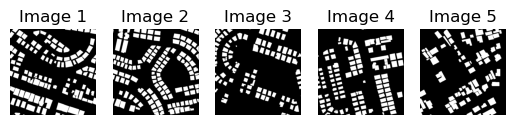

In [6]:
# Define input folder
input_folder = '1_data_preparation/dataset_png/label_encoding'

# Get all PNG image files in a folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.png')]

# Select the first five image files
selected_files = image_files[:5]

# Process and display the first five images
for i, filename in enumerate(selected_files):

    image_path = os.path.join(input_folder, filename)
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Expand pixel values ​​from 0 and 1 to 0 and 255
    enhanced_image_array = image_array * 255
    
    # Convert back to Pillow image
    enhanced_image = Image.fromarray(enhanced_image_array.astype(np.uint8), mode='L')
    
    # Displaying images
    plt.subplot(1, 5, i+1)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()